In [11]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.naive_bayes import GaussianNB

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
df = pd.read_csv(url, header=None)

In [7]:
x = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  #target

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred=model.predict(x_test)

In [14]:
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.8208469055374593
Confusion Matrix:
[[387 144]
 [ 21 369]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921

ROC AUC Score: 0.83748370273794


In [15]:
cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy')
print(f"cross validated accuracy : {cv_score.mean()}")

cross validated accuracy : 0.8217730830896915


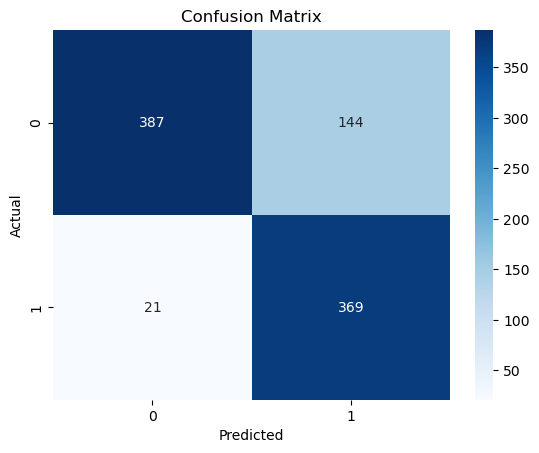

In [16]:

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
